# Moving Average Case Study

### 1. Import libraries

`conda install pandas-datareader`

``pip install git+https://github.com/pydata/pandas-datareader.git``

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 2. Get up-to-date stock value of Apple from iex

In [2]:
aapl = pdr.DataReader('AAPL', 'iex','2018-03-01','2019-03-21')
aapl.reset_index(inplace = True,drop = False)
aapl.head()

,date,open,high,low,close,volume
0,2018-03-01,175.8621,177.0785,170.0703,172.3752,48801970
1,2018-03-02,170.2082,173.6557,169.8634,173.5670,38453950
2,2018-03-05,172.5820,175.0741,171.9024,174.1679,28401366
3,2018-03-06,175.2415,175.5764,173.4882,174.0201,23788506
4,2018-03-07,172.3161,173.2124,171.6561,172.4047,31703462


### 3. Remove unneeded data

In [3]:
aapl_close = aapl
aapl_close = aapl_close.drop(columns = 'open')
aapl_close = aapl_close.drop(columns = 'high')
aapl_close = aapl_close.drop(columns = 'low')
aapl_close = aapl_close.drop(columns = 'volume')
aapl_close.head()

,date,close
0,2018-03-01,172.3752
1,2018-03-02,173.5670
2,2018-03-05,174.1679
3,2018-03-06,174.0201
4,2018-03-07,172.4047


### 4. Compute simple moving average and exponential moving average

In [0]:
aapl_close['SMA_9'] = aapl_close['close'].rolling(9).mean()
aapl_close['SMA_21'] = aapl_close['close'].rolling(21).mean()
aapl_close['EMA_21'] = aapl_close['close'].ewm(span = 21, adjust = False).mean()

### 5. Plot data and moving averages

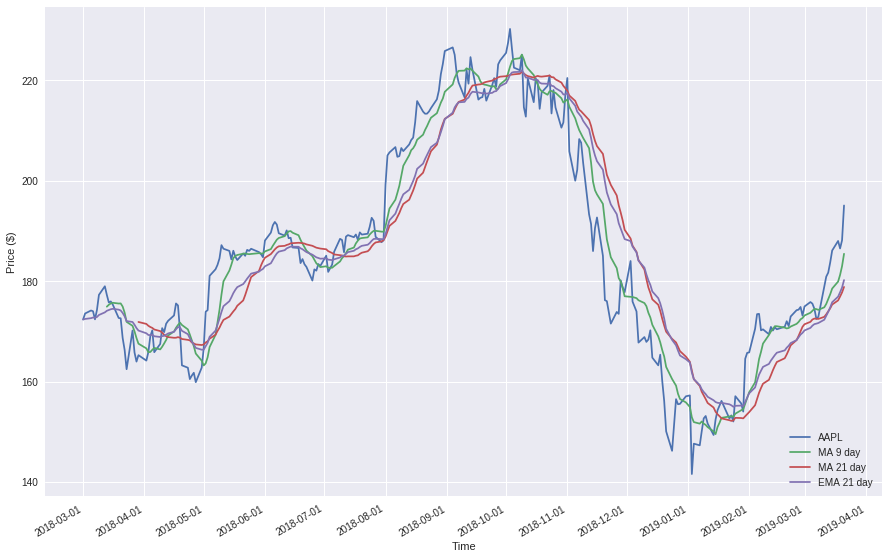

In [15]:
date = [pd.datetime.strptime(d,'%Y-%m-%d').date() for d in aapl_close['date']]
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(date, aapl_close['close'], label = 'AAPL')
ax.plot(date, aapl_close['SMA_9'], label = 'MA 9 day')
ax.plot(date, aapl_close['SMA_21'], label = 'MA 21 day')
ax.plot(date, aapl_close['EMA_21'], label = 'EMA 21 day')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.legend(loc = 4)
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.grid(True)

When should we sell? When should we buy?

In [12]:
X = aapl_close['close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.349454
p-value: 0.606254
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


What do these numbers tell us?

### 6. Compute and plot log change (instantaneous rate of return)

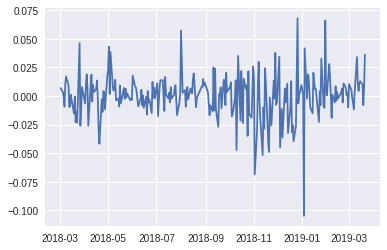

In [13]:
aapl_close['change'] = np.log(aapl_close['close'] / aapl_close['close'].shift())
plt.plot(date,aapl_close['change'])

### 7. Compute rolling historical volatility using .shift() method

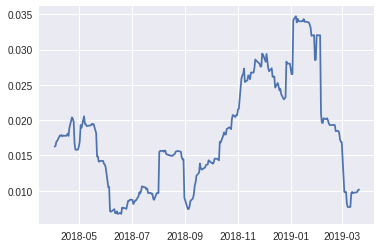

In [14]:
aapl_close['Volatility'] = aapl_close.change.rolling(21).std().shift()
plt.plot(date,aapl_close['Volatility'])